In [280]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

we first read the dataset "Movie Metadata" 
https://www.kaggle.com/karrrimba/movie-metadatacsv

In [281]:
dataset = '../input/movie-metadatacsv/movie_metadata.csv'
dataf = pd.read_csv(dataset)
dataf.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [282]:
dataf.isnull().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [283]:
dataf.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [284]:
dataf.fillna(value=0,axis=1,inplace=True)
dataf.shape

(5043, 28)

In [285]:
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']
target = ['imdb_score']

<AxesSubplot:>

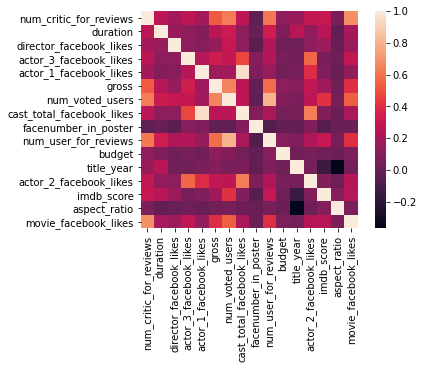

In [286]:
sns.heatmap(dataf.corr(), vmax=1, square=True)

# **For PCA**

In [287]:
x = dataf.loc[:, features].values
y = dataf.loc[:,target].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()


,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.128145,-0.369796,11.113967,5.795674,-0.267871,-0.679747,7.369209,1.025440,0.170304,-0.176214,-0.204255,1.318632
1,0.215408,2.228329,4.155888,2.798784,2.128121,-0.679747,2.559458,1.346645,0.163411,0.830302,0.189678,-0.389572
2,-0.289513,0.296390,2.469513,1.388010,0.110172,-0.182725,1.913214,1.066228,0.190983,-0.310696,0.189678,4.010348
3,13.455313,1.362287,6.295694,7.659834,5.344122,-0.679747,6.434274,1.091720,0.180643,5.288294,0.189678,8.099687
4,-0.386405,-0.427687,-0.616557,-0.604169,-0.526157,-0.679747,-0.719436,-0.182905,-6.753651,-0.405057,-1.434433,-0.389572


In [288]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


In [289]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2' ])
principalDf.head(10)

,principal component 1,principal component 2
0,9.206763,-9.148960
1,5.395706,-1.161434
2,3.383085,-3.049702
3,18.955423,-2.648398
4,-1.906675,0.154353
5,0.952058,-1.781310
6,6.636790,-1.543452
7,1.595273,-2.294432
8,13.586557,0.760371
9,7.062331,0.826880


In [290]:
dataf[target].head(10)

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,7.1
5,6.6
6,6.2
7,7.8
8,7.5
9,7.5


In [291]:
finalDf = pd.concat([principalDf, dataf[target]], axis = 1)
finalDf.head(10)

,principal component 1,principal component 2,imdb_score
0,9.206763,-9.148960,7.9
1,5.395706,-1.161434,7.1
2,3.383085,-3.049702,6.8
3,18.955423,-2.648398,8.5
4,-1.906675,0.154353,7.1
5,0.952058,-1.781310,6.6
6,6.636790,-1.543452,6.2
7,1.595273,-2.294432,7.8
8,13.586557,0.760371,7.5
9,7.062331,0.826880,7.5


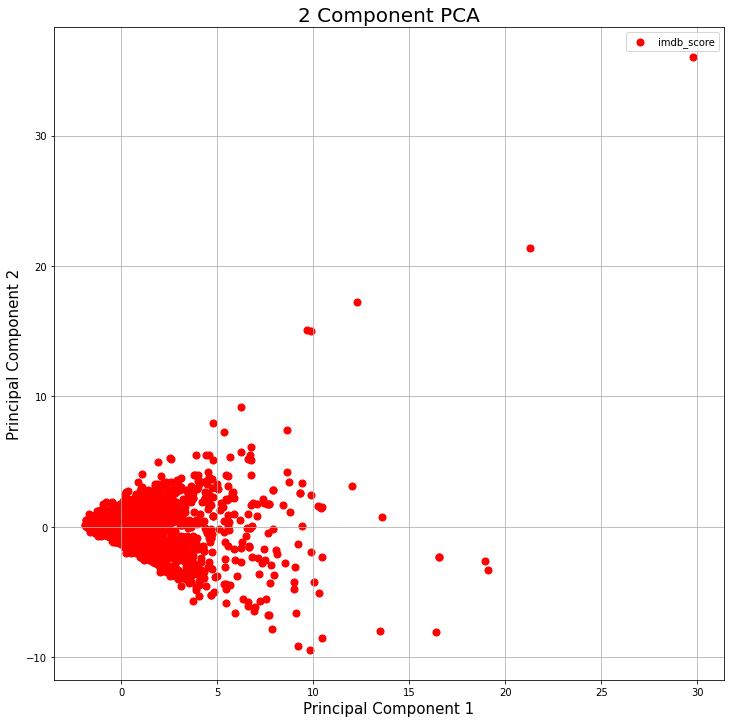

In [292]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['imdb_score']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[target] == dataf[target]
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] ,finalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
ax.legend(targets)
ax.grid()

In [293]:
pca.explained_variance_ratio_ #Explain Varience

array([0.30327239, 0.15416736])

# **CLUSTERING**

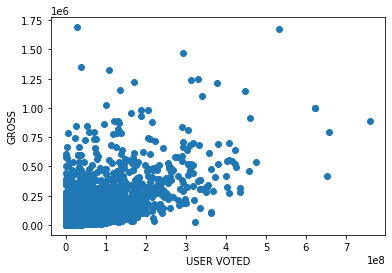

In [294]:
plt.scatter(dataf['gross'],dataf['num_voted_users'])
plt.xlabel('USER VOTED')
plt.ylabel('GROSS')
plt.show()

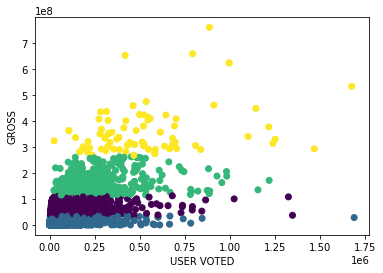

In [295]:
# KMeans Clustering the some features
data1 = dataf.loc[:,['gross','num_voted_users']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data1)
labels = kmeans.predict(data1)
plt.scatter(dataf['num_voted_users'],dataf['gross'] , c=labels)
plt.xlabel('USER VOTED')
plt.ylabel('GROSS')
plt.show()

# **Linear Regression**

In [296]:
#splitting data set into training and test data set in 0.7/0.3
train, test = train_test_split(dataf,test_size=0.30)
train.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2987,Color,Fred Schepisi,61.0,109.0,40.0,794.0,Ray Winstone,5000.0,2326407.0,Drama,...,99.0,English,UK,R,12000000.0,2001.0,1000.0,7.0,2.35,305
2118,Color,Paul Verhoeven,231.0,145.0,719.0,104.0,Sebastian Koch,2000.0,4398392.0,Drama|Thriller|War,...,232.0,Dutch,Netherlands,R,21000000.0,2006.0,380.0,7.8,2.35,0
4385,Color,Ritesh Batra,195.0,104.0,25.0,73.0,Nimrat Kaur,638.0,4231500.0,Drama|Romance,...,162.0,Hindi,India,PG,1000000.0,2013.0,85.0,7.8,2.35,16000
1614,Color,Jonathan Levine,452.0,98.0,129.0,7.0,Vincent Leclerc,303.0,66359959.0,Comedy|Horror|Romance,...,326.0,English,USA,PG-13,35000000.0,2013.0,18.0,6.9,2.35,81000
3858,Color,Todd Solondz,159.0,98.0,377.0,844.0,Shirley Henderson,1000.0,278821.0,Comedy|Drama,...,37.0,English,USA,R,0.0,2009.0,887.0,6.5,1.85,0
306,Color,Peter Hyams,174.0,121.0,0.0,595.0,Mark Margolis,1000.0,66862068.0,Action|Fantasy|Horror|Mystery,...,524.0,English,USA,R,83000000.0,1999.0,1000.0,5.7,2.35,2000
2027,Color,Terry Gilliam,84.0,137.0,0.0,161.0,David Hyde Pierce,12000.0,41895491.0,Comedy|Drama|Fantasy,...,170.0,English,USA,R,24000000.0,1991.0,443.0,7.6,1.85,12000
2636,Color,James Mangold,131.0,120.0,446.0,1000.0,Sylvester Stallone,22000.0,44886089.0,Crime|Drama|Thriller,...,207.0,English,USA,R,10000000.0,1997.0,13000.0,6.9,1.85,2000
2747,Color,Jake Paltrow,50.0,93.0,17.0,66.0,Gael Le Cornec,1000.0,20380.0,Comedy|Drama|Fantasy|Music|Romance,...,39.0,English,USA,R,15000000.0,2007.0,165.0,5.9,1.85,445
1796,Color,Judd Apatow,251.0,133.0,0.0,529.0,Martin Starr,11000.0,148734225.0,Comedy|Romance,...,559.0,English,USA,R,30000000.0,2007.0,985.0,7.0,1.85,0


In [297]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [298]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression()

In [299]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.20611596018878053
Testing score:  0.23367564589325351


In [300]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [301]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

Training score:  -0.052547778730834604
Testing score:  0.3094780472077877
